In [1]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

In [2]:
# Create a quantum circuit with 6 quantum bits and 6 classical bits
# The first three quantum bits belong to Alice, and the last three belong to Bob
qc = QuantumCircuit(6, 6)

# Prepare three pairs of entangled states
for i in range(3):
    qc.h(i)
    qc.cx(i, i + 3)

qc.barrier()
# Alice encodes information: For example, let's say Alice wants to send a 6-bit message
# Assume the message she wants to send is 110011
# The corresponding quantum gate operations are: X, Z, XZ (on her first three quantum bits)

qc.x(0)
qc.z(0)

qc.x(2)
qc.z(2)

qc.barrier()

In [3]:
# Alice sends her quantum bits to Bob (in a real case, this step is accomplished through a quantum channel)

# Bob decodes the information
# Since we are simulating all operations in a quantum circuit, Bob directly performs decoding operations
for i in reversed(range(3)):
    qc.cx(i, i + 3)
    qc.h(i)

qc.barrier()

In [4]:
# Perform measurements
qc.measure([0, 3, 1, 4, 2, 5], [0, 1, 2, 3, 4, 5])

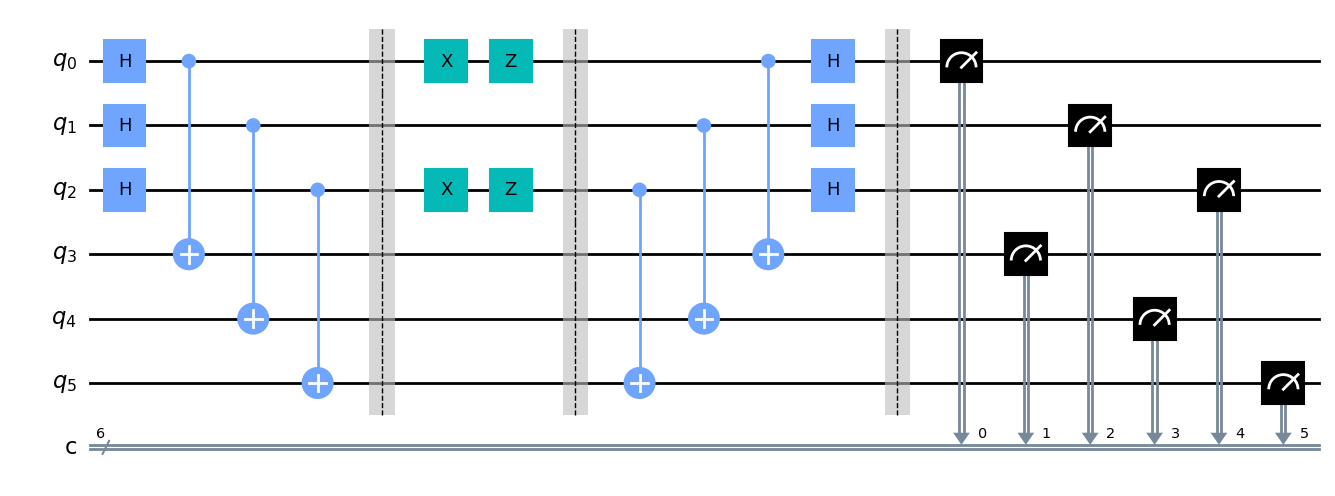

In [5]:
# Execute the circuit and get the results
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1024)
result = job.result()
counts = result.get_counts(qc)
# Draw the circuit
display(qc.draw(output='mpl'))

{'110011': 1024}


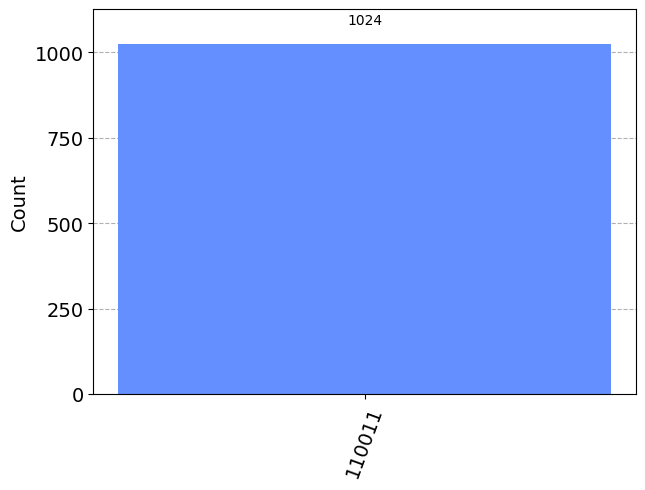

In [6]:
# Print the results
print(counts)
# draw the results
plot_histogram(counts)